# IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS

In [14]:
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [15]:
# Importando o dataset disponibilizado
df = pd.read_excel('customer_supermarket.xlsx')

In [16]:
# vendo as primeiras 5 linhas do dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,...,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

#### Valida/Trata se há algo duplicado

In [17]:
if df[df.duplicated(subset=['ID'])].shape[0] !=0:
    df.drop_duplicates(subset=['ID'])
    print('Linhas duplicadas dropadas')
else:
    print('Não há valores duplicados')

Não há valores duplicados


#### Valida/Trata se há algo NULO

In [18]:
tam = pd.DataFrame(round(df.isnull().sum()*100/df.shape[0],2)).reset_index()
tam.rename(columns={'index': 'Colunas',0:'Porcentagem_Nulos'},inplace = True)
tam[tam.Porcentagem_Nulos>0]

,Colunas,Porcentagem_Nulos
4,Income,1.07


In [19]:
# Dado que apenas 1% do dataset está nulo, iremos dropar essas linhas
df2 = df.dropna(subset=['Income'],axis=0)

print(f'Antes: {df.shape}\nDepois:{df2.shape}')

Antes: (2240, 30)
Depois:(2216, 30)


#### Calcula Idade estimada so cliente

In [20]:
# Coleta ano atual
year_today = datetime.date.today().year

In [21]:
df2['estimated_age'] = df2.Year_Birth.apply(lambda x: year_today-x)

C:\Users\leolk\AppData\Local\Temp\ipykernel_11492\699619206.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Análise de Data

In [22]:
# Arruma variavel para data
df2["Dt_Customer"] = pd.to_datetime(df2["Dt_Customer"])

C:\Users\leolk\AppData\Local\Temp\ipykernel_11492\3772936240.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Valida Range de Data do Dataset
print("Máxima:",df2.Dt_Customer.max())
print("Minima:",df2.Dt_Customer.min())


Máxima: 2022-06-29 00:00:00
Minima: 2020-07-30 00:00:00


#### Análise de Educação Escolar

In [24]:
fig = px.bar(pd.DataFrame(df2.Education.value_counts()).reset_index(), x='index',y='Education',text='Education')
fig.show()

In [25]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Days_Registered', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'estimated_age'],
      dtype='object')

#### Análise de Ofertas

In [26]:
# Podemos ver que não faz muito sentido ter Compras com Descontos e não ter pego em nenhuma promoção.  Podemos ver que isso se repete bastante abaixo
df2[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0


In [27]:
df2['DealsPurchases'] = df2.apply(lambda x: max(x.AcceptedCmp1,x.AcceptedCmp2,x.AcceptedCmp3,x.AcceptedCmp4,x.AcceptedCmp5,x.Response), axis=1)
df2[(df2.DealsPurchases==0) & (df2.NumDealsPurchases>0)][['NumDealsPurchases','DealsPurchases']]

C:\Users\leolk\AppData\Local\Temp\ipykernel_11492\1401798047.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NumDealsPurchases,DealsPurchases
1,2,0
2,1,0
3,2,0
4,5,0
5,2,0
...,...,...
2232,1,0
2233,4,0
2234,1,0
2235,2,0


In [28]:
#Dado o resultado, eu droparia essas colunas
df2.drop(columns=['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response','DealsPurchases'],inplace=True)

C:\Users\leolk\AppData\Local\Temp\ipykernel_11492\3597344520.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Análise de Meio de Compra

In [29]:
fig = px.bar(pd.DataFrame(df2[['NumStorePurchases','NumCatalogPurchases','NumWebPurchases']].sum()).reset_index(), x='index',y=0,text=0)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['NumStorePurchases','NumCatalogPurchases','NumWebPurchases'],
        ticktext = ['Loja','Catalogo','Web']
    )
)
fig.show()

In [30]:
pd.DataFrame(df2[['NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumStorePurchases']].sum()).reset_index()

,index,0
0,NumStorePurchases,12855
1,NumCatalogPurchases,5919
2,NumWebPurchases,9053
3,NumStorePurchases,12855


#### Deixando apenas colunas que serão utilizadas

In [31]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,estimated_age
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,...,88,88,8,10,4,7,0,3,11,58
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,...,1,6,1,1,2,5,0,3,11,61
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,...,21,42,8,2,10,4,0,3,11,50
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,...,3,5,2,0,4,6,0,3,11,31
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,...,27,15,5,3,6,5,0,3,11,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1975,Graduation,Married,61223.0,0,1,2021-06-13,567,46,...,118,247,9,3,4,5,0,3,11,48
2236,4001,1954,PhD,Together,64014.0,2,1,2022-06-10,205,56,...,0,8,8,2,5,7,0,3,11,69
2237,7270,1989,Graduation,Divorced,56981.0,0,0,2022-01-25,341,91,...,12,24,2,3,13,6,0,3,11,34
2238,8235,1964,Master,Together,69245.0,0,1,2022-01-24,342,8,...,30,61,6,5,10,3,0,3,11,59


In [32]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Days_Registered', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'estimated_age'],
      dtype='object')

In [33]:
df3 = df2[['ID','estimated_age', 'Education','Marital_Status','Income',
        'Days_Registered', 'Recency', 'MntFruits','MntMeatProducts','MntSweetProducts','MntWines','MntGoldProds','NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']]

#### Analise de distribuição dos dados numéricos

In [34]:
columns_num=[]
for c in df3.drop(columns=['ID']).columns:
    if 'int' in str(df3[c].dtypes) or 'float' in str(df3[c].dtypes):
        columns_num.append(c)

In [35]:
i=0
linha = math.ceil(len(columns_num)/3)
col = 3
fig = make_subplots(rows=linha, cols=col)
for li in range(1,linha+1):
    for co in range(1,col+1):
        if i <len(columns_num):
            fig.append_trace(go.Box(y=df3[columns_num[i]], name=columns_num[i]), row=li, col=co)
            i+=1
fig.update_layout(height=1000, width=1500, title_text="BOXPLOT")
fig.show()


#### Remover Outlier

In [36]:
#### Após analise de boxplot, dado que é apenas 1 registo muito acima, droparemos esse dado
df3[df3.Income<df3.Income.quantile(0.9999)].shape,df3.shape

((2215, 15), (2216, 15))

In [37]:
df3 = df3[df3.Income<df3.Income.quantile(0.9999)]

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [38]:
df3['MntTotal'] = df3.apply(lambda x: (x['MntFruits']+x['MntMeatProducts']+x['MntSweetProducts']+x['MntWines']+x['MntGoldProds']), axis=1)

In [39]:
# Dropando valores ja agregados
df3.drop(columns=['MntFruits','MntMeatProducts','MntSweetProducts','MntWines','MntGoldProds'],inplace=True)
df3.head(2)

,ID,estimated_age,Education,Marital_Status,Income,Days_Registered,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntTotal
0,5524,58,Graduation,Single,58138.0,849,58,8,10,4,1445
1,2174,61,Graduation,Single,46344.0,299,38,1,1,2,25


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [40]:
df4 =df3[['Recency','Days_Registered','MntTotal','Income']]
df4.head(2)

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0


### Atividade 5: Padronize os dados.

In [41]:
# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
new_df_scaled  = df4.copy()

# aplicando a padronização
new_df_scaled[new_df_scaled.columns] = scaler.fit_transform(new_df_scaled)

new_df_scaled.head()

,Recency,Days_Registered,MntTotal,Income
0,0.310113,1.528882,1.537898,0.286604
1,-0.380899,-1.188066,-0.956951,-0.261407
2,-0.795506,-0.205025,0.167488,0.912723
3,-0.795506,-1.059629,-0.925326,-1.176680
4,1.553934,-0.950951,-0.340267,0.293806


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [42]:
# Para fazer o dendograma, primeiramente precisamos das distâncias, que é obtida com o uso da função linkage.
# gerando a matriz de distâncias com a função linkage
distancias = linkage(new_df_scaled,
                     method='ward',
                     metric='euclidean')

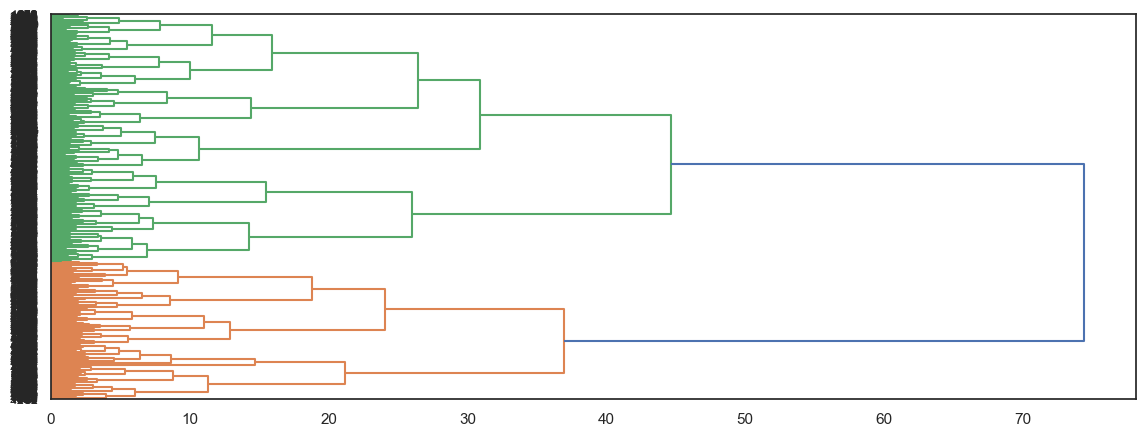

In [43]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right')

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [44]:
# Analisando o dendograma aparentemente tem 3 grandes grupos

In [45]:
# importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=3, criterion='maxclust')

In [46]:
df3['grupos'] = grupos
df3.head(2)

,ID,estimated_age,Education,Marital_Status,Income,Days_Registered,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntTotal,grupos
0,5524,58,Graduation,Single,58138.0,849,58,8,10,4,1445,1
1,2174,61,Graduation,Single,46344.0,299,38,1,1,2,25,3


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

In [58]:
columns_num=[]
for c in df3.drop(columns=['ID','grupos']).columns:
    if 'int' in str(df3[c].dtypes) or 'float' in str(df3[c].dtypes):
        columns_num.append(c)

In [59]:
i=0
col = 2
linha = math.ceil(len(columns_num)/col)
fig = make_subplots(rows=linha, cols=col,subplot_titles=([x.upper() for x in columns_num]))
for li in range(1,linha+1):
    for co in range(1,col+1):
        if i <len(columns_num):
            fig.append_trace(go.Box(y=df3[df3.grupos == 1][columns_num[i]], name='Grupo 1'), row=li, col=co)
            fig.append_trace(go.Box(y=df3[df3.grupos == 2][columns_num[i]], name='Grupo 2'), row=li, col=co)
            fig.append_trace(go.Box(y=df3[df3.grupos == 3][columns_num[i]], name='Grupo 3'), row=li, col=co)
            i+=1
fig.update_layout(height=2000, width=1500, title_text="BOXPLOT",showlegend=False)
fig.show()


#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

In [110]:
columns_num=[]
for c in df3.drop(columns=['ID','grupos']).columns:
    if 'int' in str(df3[c].dtypes) or 'float' in str(df3[c].dtypes):
        columns_num.append(c)
for c in columns_num:
  fig = px.histogram(df3, x=c, color="grupos")
  fig.update_layout(
    autosize=False,
    width=800,
    height=300,)
  fig.show()

In [112]:
columns_num = ['Education','Marital_Status']
legenda=[True,False]
i=0
col = 2
linha = math.ceil(len(columns_num)/col)
fig = make_subplots(rows=linha, cols=col,subplot_titles=([x.upper() for x in columns_num]))
for li in range(1,linha+1):
    for co in range(1,col+1):
        if i <len(columns_num):
            valor,coluna = df3[df3.grupos == 1][columns_num[i]].value_counts().values , df3[df3.grupos == 1][columns_num[i]].value_counts().index
            fig.append_trace( go.Bar(name='Grupo 1', x=coluna, y=valor,text=valor,marker_color='#636EFA',showlegend=legenda[i]), row=li, col=co)

            valor,coluna = df3[df3.grupos == 2][columns_num[i]].value_counts().values , df3[df3.grupos == 2][columns_num[i]].value_counts().index
            fig.append_trace( go.Bar(name='Grupo 2', x=coluna, y=valor,text=valor,marker_color='#EF553B',showlegend=legenda[i]), row=li, col=co)

            valor,coluna = df3[df3.grupos == 3][columns_num[i]].value_counts().values , df3[df3.grupos == 3][columns_num[i]].value_counts().index
            fig.append_trace( go.Bar(name='Grupo 3', x=coluna, y=valor,text=valor,marker_color='#00CC96',showlegend=legenda[i]), row=li, col=co)
            i+=1
fig.update_layout(height=500, width=1500, title_text="BOXPLOT")
fig.show()


In [122]:
fig = px.bar(pd.DataFrame(df3[['grupos']].value_counts()).reset_index(), x='grupos',y=0,text=0)
fig.show()

In [124]:
### Meio de compra do grupo 1
fig = px.bar(pd.DataFrame(df3[df3.grupos==1][['NumStorePurchases','NumCatalogPurchases','NumWebPurchases']].sum()).reset_index(), x='index',y=0,text=0,title='Grupo 1')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['NumStorePurchases','NumCatalogPurchases','NumWebPurchases'],
        ticktext = ['Loja','Catalogo','Web']
    )
)
fig.show()

In [127]:
### Meio de compra do grupo 2
fig = px.bar(pd.DataFrame(df3[df3.grupos==2][['NumStorePurchases','NumCatalogPurchases','NumWebPurchases']].sum()).reset_index(), x='index',y=0,text=0,title='Grupo 2')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['NumStorePurchases','NumCatalogPurchases','NumWebPurchases'],
        ticktext = ['Loja','Catalogo','Web']
    )
)
fig.show()

In [128]:
### Meio de compra do grupo 3
fig = px.bar(pd.DataFrame(df3[df3.grupos==2][['NumStorePurchases','NumCatalogPurchases','NumWebPurchases']].sum()).reset_index(), x='index',y=0,text=0,title='Grupo 3')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['NumStorePurchases','NumCatalogPurchases','NumWebPurchases'],
        ticktext = ['Loja','Catalogo','Web']
    )
)
fig.show()

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

# RESPOSTA

Grupo 1:
* Pessoas com condição salarial melhor
* São clientes que fazem cadastro
* Costumam comprar mais produtos
* Tem um alto gasto em produtos.
* Estudam no mínimo até a faculdade
* Prefere Lojas, mas compra por outros meios também

Grupo 2:
* Possui uma renda menor
* Possui um intervalo entre compras alto
* Possui um baixo gasto em produtos
* Prefere comprar pela Loja ou Internet
 
Grupo 3:
* Possui um intervalo entre compras baixo
* Prefere comprar pela Loja ou Internet